<div style="border:solid green 2px; padding: 20px">
<b>Илья, привет!</b>

Меня зовут Евгений Д., и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Задача проекта 

Гланая цель проекта определить самый выгодный для компании тарифный план. 

План работы над проектом.

1. <a href='#анализ'> Общая информация.</a>

    <a href='#analysis_output'> Вывод </a>

2. <a href ='#предобработка'>Предобработка данных. Замена пропусков, типов данных, поиск дубликатов. </a>
    
    2.1 <a href ='#change_data'> Проверка типа данных </a>
    
    2.2 <a href ='#NaN_zero'> Обработка пустых и нулевых значений </a>
    
    2.3 <a href ='#duble'> Поиск дубликатов </a>
  
  <a href ='#output_preparation'> Вывод </a>
  

3. <a href ='#Подсчет'> Подсчет данных </a>

    3.1 <a href='#звонки'>Количество сделанных звонков и израсходованных минут разговора по месяцам</a> 
    
    3.2 <a href="#message">Количество отправленных сообщений по месяцам</a>
    
    3.3 <a href="##internet"> Объем израсходованного интернет-трафика по месяцам </a>
    
    3.4 <a href="#peer_month_proceed"> Помесячную выручку с каждого пользователя</a>

  
  
4. <a href="##description">Описание поведения клиентов оператора</a>

    4.1 <a href='#volume'>Обьем минут разговора, интернет-трафика и сообщений </a>
    
    4.2 <a href='#mean'> Среднее, дисперсия и стандартное отклонение. </a>
    
 
5. <a href="##hypothesis"> Проверка гипотез </a>
    
    5.1 <a href="##mean proceeds"> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается </a>
    
    5.2 <a href="##mean proceeds_city"> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов </a>


6. <a href='##output'>Вывод </a>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

<a id='анализ'></a>

# 1. Общий анализ данных.

Открыть файлы с данными, проверить наличие пустых значений, проверить соответсвие типов данных.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats as st

In [2]:
# calls 
calls = pd.read_csv('/datasets/calls.csv')

calls.info()
calls.head()
calls.duration.describe()
calls.head(10)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
#internet

internet = pd.read_csv('/datasets/internet.csv')
internet.mb_used.describe()
internet.info()
internet.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [4]:
#messages

messages = pd.read_csv('/datasets/messages.csv')
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [5]:
#tariffs
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
#users
users = pd.read_csv('/datasets/users.csv')
users.info()
users.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<a id='analysis_output'></a>
## Вывод

<div class="output">
    ---
    
1. Таблица calls - Пропусков нет, но есть нудлевые значения в стлбце duration.

    * call_date - првести в типу время
 
    * duration - округлить в большую сторону


2. internet - пустых значений нет, есть столбец Unnamed: 0 в описании к проекту его нет.
 
    * session_date - привести к типу дата.

    * mb_used - округлить в большую сторону. проверить нулевые значения.  


3. messages - пропусков нет.

    * message_date - привести к типу дата.
    

4. tariffs - пропусков нет, нулевых значений нет.


5. users - пропусков нет. есть значения NaN

    * проверить поле churn_date. 
 
    * reg_date - привести к типу дата
 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Отлично, первичные данные мы посмотрели.
    
Давай теперь их обработаем. 
    
</div>

<a id='предобработка'></a>

# 2. Предобработка.

<a id='change_data'></a>
### Проверка типов данных

In [7]:

calls.call_date = pd.to_datetime(calls.call_date,format='%Y-%m-%d')


internet.session_date = pd.to_datetime(internet.session_date,format='%Y-%m-%d')

users.reg_date = pd.to_datetime(users.reg_date,format='%Y-%m-%d')

messages.message_date = pd.to_datetime(messages.message_date,format='%Y-%m-%d') 


<a id='NaN_zero'></a>
### Работа с пропусками


<a id='calls'></a>


количество строк с нулевыми значениями 39613


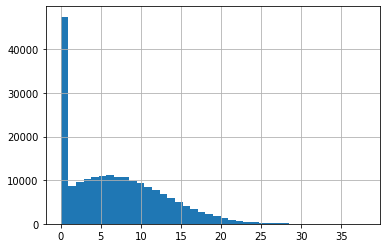

In [8]:
# Посмотрим на гистограмму по звонкам.
calls.duration.hist(bins=40)

# Большой пик на нуле, посмотрим сколько таких строк

print('количество строк с нулевыми значениями', len(calls.loc[calls.duration == 0]))

#Округлим до целого в большую сторону, согласно условиям тарификации.
calls.duration = calls.duration.apply(math.ceil)


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Кстати подписывать графики мы можем с помощью метода `plt.title`
</div>

In [9]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


<a id='internet_df'></a>


In [10]:

#избавимся от ненужного столбца и округлим значения в большую сторону
internet = internet.loc[:,['id','mb_used','session_date','user_id']] 
internet.mb_used = internet.mb_used.apply(math.ceil)

#посчитаем кол-во нулевых значений.
print('количество нулевых значений',len(internet.loc[internet.mb_used == 0]))
#Удалим нулевые ссесси
internet=internet.query('mb_used!=0')
print('количество нулевых значений',len(internet.loc[internet.mb_used == 0]))

количество нулевых значений 19598
количество нулевых значений 0


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Здорово, что мы учитываем условия работы оператора связи 👍
    
</div>

In [11]:
users.info()
users.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<a id = 'duble'></a>
### Поиск дубликатов


In [12]:
internet.duplicated().sum()
calls.duplicated().sum()
users.duplicated().sum()

0

<a id='output_preparation'></a>
## Вывод

1. Звонки и интернет
В таблице есть нулевые значения и их достаточно много. Удалять или заменять их не стоит, они нужны. Звонок с нулевой продолжительностью тоже звнок, он влияет на понимание общего количества совершеных звонков, но не влияет на общую продолжительность.


2. Интернет
В таблице есть нулевые значения и их достаточно много. Удалять нет смысла, на объем трафика они не влияют. В отличие от звонков, нулевая интернет сессия может указывать на проблемы с прохождением трафика, эту информацию нужно отдельно изучать. В рамках текущих вопросов эти данные не искажают представление о среднем пользовательском трафике 

3. Users, tariffs, messages. Артефактов не замечено. Из всех таблиц только в users столбец churn_date был с NaN, но он  не несет никакой ценности для нас, поэтому значения NaN остались в таблице. 



Были приведены к типу дата.

calls.call_date internet.session_date users.reg_date messages.message_date - 

Дубликатов не обнаружено.



<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Достаточно детально подготовили наши данные, давай теперь осуществим нужные нам подсчеты. 
    
</div>


<a id="Подсчет"></a>


# 3. Подсчет-данных.

<a id='звонки'> </a>
### 3.1 количество сделанных звонков и израсходованных минут разговора по месяцам

    

In [13]:
# Для подсчета возьмем датафрейм calls и добавим столбец с месяцем.

calls['month'] = calls.call_date.dt.month
# сгруппируем по пользователям, месяцам и посчитаем общую продолжительность звонков
# и их количество


calls.groupby(['user_id','month'])['duration','id'].agg({'id':'count','duration':'sum'})


id  duration
user_id month              
1000    5      22       159
        6      43       172
        7      47       340
        8      52       408
        9      58       466
...            ..       ...
1498    10     41       247
1499    9       9        70
        10     68       449
        11     74       612
        12     69       492

[3174 rows x 2 columns]

In [14]:
#Теперь удалим нулевые звонки, дальше они нам не нужны

calls = calls.query('duration!=0')


<a id='message'> </a>
### 3.2 количество отправленных сообщений по месяцам для каждого пользователя

In [15]:
#Добавим столбец с месяцем отправки сообщшения
messages['month'] = messages.message_date.dt.month
messages.pivot_table(index='user_id',columns='month',aggfunc='count',values='id').fillna(0)


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0
1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,82.0,82.0,79.0,84.0
1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,14.0,17.0


<a id='#internet'> </a>
### 3.3 Объем израсходованного интернет-трафика по месяцам

In [16]:
internet['month'] = internet.session_date.dt.month
internet.pivot_table(index='user_id',columns='month',aggfunc='sum',values='mb_used').fillna(0)


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18452.0,14053.0
1002,0.0,0.0,0.0,0.0,0.0,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8571.0,12479.0,14779.0,11368.0,10132.0
1004,0.0,0.0,0.0,0.0,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2616.0,33105.0,29393.0,38972.0,23450.0
1496,3766.0,28523.0,24990.0,21098.0,23740.0,20163.0,24395.0,23560.0,26970.0,28215.0,25092.0,20757.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11512.0,14174.0,19940.0


In [17]:
# сводная таблица по звонкам
user_month_calls = calls.groupby(['user_id','month']).agg({'id':'count','duration':'sum'})
user_month_calls.columns=['count_calls','duration_calls']

#Сводная таблица по сообщениям
user_month_messages = messages.groupby(['user_id','month']).agg({'id':'count'})
user_month_messages.columns=['count_messages'] 

#сводная таблица по трафику
user_month_internet = internet.groupby(['user_id','month']).agg('sum')
user_month_internet.columns=['mb_used']

#Сведем все в одну таблицу

calc_table = pd.merge(user_month_calls.reset_index(),user_month_messages.reset_index(),how='outer',on=['user_id','month'])

calc_table=calc_table.merge(user_month_internet.reset_index(), how='outer',on=['user_id','month'])
calc_table = pd.merge(calc_table, users[['user_id','tariff','city']],on='user_id',how='left')
#заменим NaN нулями для удобсва в дальнейших расчетах.
   
calc_table = calc_table.merge(tariffs,left_on='tariff',right_on='tariff_name').fillna(0)
calc_table
#Получилас довольно большая таблица, но со всеми  данными.

,user_id,month,count_calls,duration_calls,count_messages,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17.0,11066.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3210,1489,9,0.0,0.0,32.0,17232.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3211,1489,10,0.0,0.0,21.0,19588.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3212,1489,11,0.0,0.0,20.0,17516.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,smart


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

В целом таблицы мы объединили верно.
    
Однако при их соединении, мы потеряли двух пользователей. Поэтому важно заранее определять как мы будем соединять таблицы.
    
В нашем случае нужно присоединить к той таблице где есть все пользователи. 
    
</div>

In [18]:
f'Количество пользователей: {calc_table.user_id.nunique()}'

'Количество пользователей: 498'

In [19]:
#расчет по звонкам.
def over_price_call(row):
    if row['duration_calls'] > row['minutes_included']:
        over_price_call = (row['duration_calls']-row['minutes_included'])*row['rub_per_minute']
    else: over_price_call = 0
        
    return over_price_call

#расчет по интернет трафику.
def over_price_internet(row):
    if row['mb_used'] > row['mb_per_month_included']:
        over_price_internet = ((row['mb_used']-row['mb_per_month_included'])/1000)*row['rub_per_gb']
    else: over_price_internet = 0
    return over_price_internet
#расчет по сообщениям.
def over_price_message(row):
    if row['count_messages'] > row['messages_included']:
        over_price_message = (row['count_messages']-row['messages_included'])*row['rub_per_message']
    else: over_price_message = 0
    return over_price_message    
    
#общая выручка
def total_sum(row):
    total_over_price = row['over_price_call']+row['over_price_internet']+row['over_price_message']
    return total_over_price
    
    
calc_table['over_price_call'] = calc_table.apply(over_price_call,axis=1)
calc_table['over_price_internet'] =  calc_table.apply(over_price_internet,axis=1)
calc_table['over_price_message'] = calc_table.apply(over_price_message,axis=1)
calc_table['over_price_total'] = calc_table.apply(total_sum,axis=1)
calc_table['total_proceeds'] = calc_table['over_price_total']+calc_table['rub_monthly_fee']
 



<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Выручка посчитана верно. 
    
</div>

<a id='peer_month_proceed'></a>
### 3.4 Помесячная выручка по каждому пользователю

In [20]:

#calc_table.groupby('month','user_id')['total_proceeds'].agg({'total_proceeds':'sum'})
calc_table.pivot_table(index='user_id',columns='month',values='total_proceeds',aggfunc='sum').fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.00,1950.0,1950.0,1950.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1168.4,550.0
1002,0.0,0.0,0.0,0.0,0.0,550.0,998.2,1547.4,820.40,550.0,1200.0,1105.4
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.00,1950.0,1950.0,1950.0
1004,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.00,1950.0,1950.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,2307.75,1950.0,3187.8,1950.0
1496,550.0,3464.6,2647.0,1760.6,2226.0,1675.6,2603.0,2271.0,2872.00,3121.0,2982.4,1686.4
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,550.0,550.0,1601.0


## Вывод
Сформирована итоговая таблица.
Судя по предстваленным данным, видет ощутимый прирос польззователей в течении года. 

<a id='#description'> </a>
# Описание поведения клиентов оператора

<a id='volume'></a>
### 4.1 Обьем минут разговора, интернет-трафика и сообщений

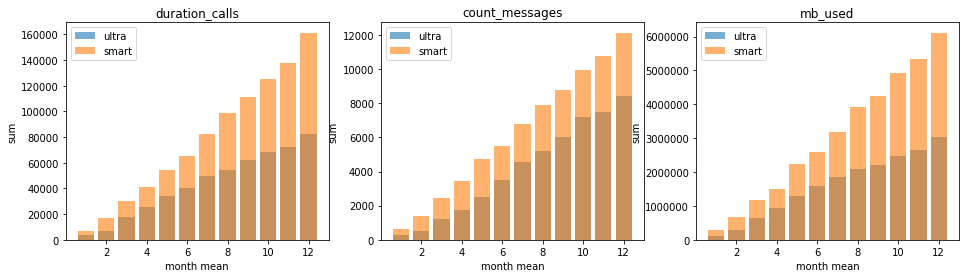

In [21]:
#создадим список с параметрами для отрисовки
tariff_list = calc_table['tariff'].unique().tolist()

graph_list = ['duration_calls','count_messages','mb_used']

#создадим панель графиков
f, axis = plt.subplots(1,len(graph_list),figsize=(16,4))
#отрисуем в цикле
for i in tariff_list:
   
    for  g in graph_list:
        bar_table = calc_table.query('tariff==@i').pivot_table(index='month',values=g,aggfunc='sum').reset_index()
        # потребление по месяцам 
        axis[graph_list.index(g)].bar(bar_table['month'],bar_table[g],label=i,alpha=0.6)
        
        axis[graph_list.index(g)].set_title(g)
        axis[graph_list.index(g)].set_xlabel('month mean')
        axis[graph_list.index(g)].set_ylabel('sum')
        axis[graph_list.index(g)].legend()
        
        
  

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Очень классные графики 👍
    
Если тебе понравилась тема визуализации, рекомендую посмотреть на библиотеку `seaborn`
    
</div>

In [22]:
#Прирост пользователей.
count_user_peer_month=calc_table.pivot_table(index='tariff',columns='month',values='user_id',aggfunc='count').reset_index()
count_user_peer_month

month,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,smart,34,58,77,112,141,164,201,235,260,294,316,337
1,ultra,9,24,37,55,67,84,91,107,115,123,134,139


In [23]:
#посмотрим по общему обьему и в процентном соотношении
sum_table=(
    calc_table
    .pivot_table(index='tariff'
                 ,values=['duration_calls','count_messages','mb_used','total_proceeds']
                 ,aggfunc='sum')
    .reset_index()
)
sum_table['percent_count_messages'] = sum_table.count_messages / sum_table.count_messages.sum() 
sum_table['percent_duration_calls']=sum_table.duration_calls / sum_table.duration_calls.sum() 
sum_table['percent_mb_used']=sum_table.mb_used / sum_table.mb_used.sum() 
sum_table['percent_proceeds']=sum_table.total_proceeds / sum_table.total_proceeds.sum()
sum_table

,tariff,count_messages,duration_calls,mb_used,total_proceeds,percent_count_messages,percent_duration_calls,percent_mb_used,percent_proceeds
0,smart,74413.0,931577.0,36174861.0,2778084.40,0.604807,0.642334,0.653336,0.577526
1,ultra,48623.0,518724.0,19194598.0,2032234.95,0.395193,0.357666,0.346664,0.422474


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

В том числе мы можем транспонировать наши расчеты, чтобы нам было удобно изучать эти данные. 
    
</div>

In [24]:
# переплаты по пользователм 
over_price_table = (
calc_table
    .groupby(['user_id','tariff'])
            ['over_price_call','over_price_internet','over_price_message','over_price_total','tariff','duration_calls']
    .agg('sum')
    .reset_index()
)
#Отметим пользователей с переплатой
over_price_table['over_fact'] = over_price_table.over_price_total > 0

#снова сгруппируем и посчитаем общую переплату по тарифам и  количество пользователей
over_by_user = (
    over_price_table.groupby('tariff')
    .agg({'user_id':'count','over_price_total':'sum','over_fact':'sum'})
    .reset_index()
)

over_by_user['persent_user_with_over'] = over_by_user['over_fact'] /over_by_user['user_id']
over_by_user['ovver_sum_by_user'] = over_by_user['over_price_total'] / over_by_user['over_fact']
over_by_user

,tariff,user_id,over_price_total,over_fact,persent_user_with_over,ovver_sum_by_user
0,smart,350,1552134.40,333.0,0.951429,4661.064264
1,ultra,148,111484.95,43.0,0.290541,2592.673256


### Вывод
Обьем по всем тарификационным еденицам увеличивается с каждым месяцем, это связанно с приходом новых пользователей.
На месячном распределении это отчетливо видно.
Например пользователям тарифа ultra на 9 пользователей было достаточно всего  окло 3000 минут, а вконце года для 148 пользователй уже более 80 000

Стоит отметить, что при том что пользователей с тарифом ultra меньше более чем в 2 раза, они генерируют более трети трафика по всем параметрам и их доля в общей выручке составляет 42%.

Так же на протяжении всего года был активный прирост клиентов. 
в конце года отношение пользоватлей с тарифом smart и ultra осталось практически без изменений по сравнению на началом года.Прирост пользователей идет поропорционально.

 

<a id='mean'> </a>
### 4.2 Среднее, дисперсия и стандартное отклонение 

In [25]:
# smart

(calc_table
 .query('tariff=="smart"')
 .groupby('month')['duration_calls','count_messages','mb_used']
 .agg(['mean',np.median])
 .round(0)
) 

duration_calls        count_messages         mb_used         
                mean median           mean median     mean   median
month                                                              
1              204.0  162.0           18.0   15.0   8524.0   7107.0
2              299.0  258.0           24.0   20.0  11611.0  12572.0
3              390.0  409.0           32.0   23.0  15124.0  15690.0
4              367.0  368.0           31.0   28.0  13479.0  14104.0
5              387.0  433.0           34.0   30.0  15825.0  16343.0
6              396.0  400.0           33.0   28.0  15815.0  16096.0
7              408.0  414.0           34.0   29.0  15764.0  15948.0
8              421.0  432.0           34.0   27.0  16632.0  16855.0
9              429.0  435.0           34.0   30.0  16325.0  16050.0
10             426.0  428.0           34.0   30.0  16779.0  17248.0
11             435.0  428.0           34.0   28.0  16918.0  17036.0
12             479.0  471.0           36.0   29.0  18137.0  17741.0

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Здорово, что смогли посчитать таким способом 👍
    
</div>

In [26]:
#Ulta
(calc_table
 .query('(tariff=="ultra")')
 .groupby('month')['duration_calls','count_messages','mb_used']
 .agg(['mean',np.median])
 .round(0)
)

duration_calls        count_messages         mb_used         
                mean median           mean median     mean   median
month                                                              
1              428.0  382.0           34.0   32.0  13154.0  14808.0
2              297.0  168.0           22.0    6.0  11787.0   7336.0
3              490.0  403.0           32.0   20.0  17552.0  17513.0
4              458.0  453.0           32.0   17.0  16844.0  16662.0
5              510.0  519.0           38.0   25.0  19381.0  18717.0
6              480.0  479.0           42.0   28.0  18942.0  19496.0
7              546.0  542.0           50.0   38.0  20515.0  20034.0
8              511.0  500.0           48.0   40.0  19594.0  18945.0
9              539.0  520.0           52.0   43.0  19222.0  19675.0
10             558.0  533.0           58.0   49.0  20064.0  20359.0
11             541.0  546.0           56.0   43.0  19805.0  18398.0
12             593.0  584.0           61.0   51.0  21814.0  21994.0

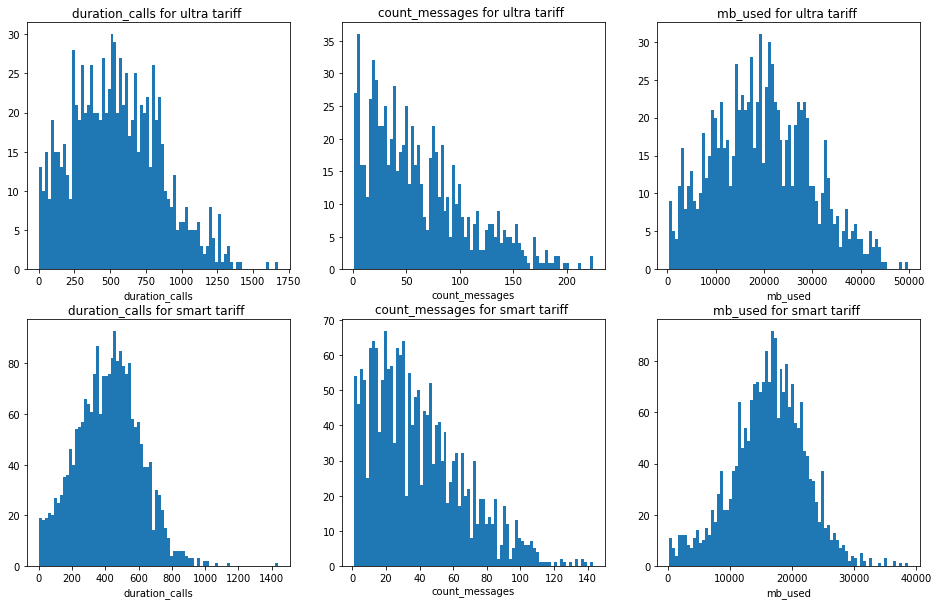

In [27]:

fig, ax = plt.subplots(len(tariff_list),len(graph_list),figsize=(16,10))

for i in tariff_list:
    calc_tariff_hist = calc_table.query('tariff==@i').fillna(0)
    for j in graph_list:
        #гистограмы по интересующим столбцам, без нудевых значений
        ax[tariff_list.index(i),graph_list.index(j)].hist(calc_tariff_hist.loc[calc_tariff_hist[j]!=0, j],bins=80)
        #ax[tariff_list.index(i),graph_list.index(j)].boxplot(calc_tariff_hist.loc[calc_tariff_hist[j]!=0, j])
        ax[tariff_list.index(i),graph_list.index(j)].set_title('ddd')
        ax[tariff_list.index(i),graph_list.index(j)].set_title(j+" for "+i+" tariff ")
        ax[tariff_list.index(i),graph_list.index(j)].set_xlabel(j)



In [28]:
(calc_table
 .groupby('tariff')['duration_calls','count_messages','mb_used']
 .agg(['mean',np.median, np.var,np.std,np.min,np.max])
 .round(0)
)

duration_calls                                      count_messages  \
                 mean median       var    std amin    amax           mean   
tariff                                                                      
smart           418.0  422.0   36219.0  190.0  0.0  1435.0           33.0   
ultra           527.0  518.0  100874.0  318.0  0.0  1673.0           49.0   

                                         mb_used                        \
       median     var   std amin   amax     mean   median          var   
tariff                                                                   
smart    28.0   797.0  28.0  0.0  143.0  16229.0  16531.0   34545911.0   
ultra    38.0  2285.0  48.0  0.0  224.0  19487.0  19324.0  101935621.0   

                               
            std amin     amax  
tariff                         
smart    5878.0  0.0  38610.0  
ultra   10096.0  0.0  49789.0

In [29]:
np.var(calc_table.loc[calc_table.tariff=="smart",'duration_calls'],ddof=1)
np.var(calc_table.loc[calc_table.tariff=="smart",'count_messages'],ddof=1)


796.8129584480083

## Вывод

Графики
1. начнем со звонков.
 * Распределение нормальное в  обоих вариантах тарифов. Но есть сильные скачки значений. 
 * продолжительность разгоров у клиентов с тарифов smart имеет больший разлет по оси х,в  сравнении с клиентами  тарифа ultra, наверное из-за разности количества клиентов или из-за особенностей пользователей подключающизся к тарифам в течнии года. 
 * Количество пользозвателей, которые имеют большую продолжительность разговоров, больше с тарифрм ultra чем smart

2. сообщения 
 * Распределение похоже на скошенное вправо. Много пиковых значений.Вероятно есть пользователи, которые очень активно рассылают много сообшений.
 
3. трафик.
 * распределение потребления трафика очень похоже на распределение звонков в соответсвии с тарифом.
 
Дисперсия и отклонение.

Цифры говорят о большом разброс в данных(те самые скачки на графиках). Даже с учетом разделения по тарифам. 
Меньше отклонение у пользователей тарифа smart.
Такой разброс может быть связан с моментом подключением новых пользователей. Новый пользователь может подключиться в конце месяца и не успеть обеспечить близкое к среднему значению количество минут, интернет трафика или сообщений.
на графиках видно большой пик возле нулевых значений.
Или же это следствие кол-ва пользователей, которых мало, но при этом генерация трафика достаточно большая.


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Думаю теперь мы знаем поведение наших пользователей, теперь давай проверим наши гипотезы.
    
</div>

<a id='#hypothesis'> </a>
# 5. Проверка гипотез

<a id='#mean proceeds'></a>
### 5.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    
Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте.
    
В том числе стоит визуализировать распределение каждой выборки. 
    
</div>

In [30]:
# Сформулируем нулевую гипотезу. "Разница между средней выручкой от тарифа smart и ultra равна 0 "
# Сформулируем альтернативную гипотезу. "Разница между средней выручкой от тарифа smart и ultra не равна 0 "

# Сформируем две выборки для проверки гипотезы.

smart_proceed_mean=(
    calc_table.loc[calc_table.tariff=="smart",'total_proceeds']
)

ultra_proceed_mean=(
    calc_table.loc[calc_table.tariff=="ultra",'total_proceeds']
)


alpha = 5

results = st.ttest_ind(
    smart_proceed_mean, 
    ultra_proceed_mean)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 4.934037452951445e-180
Отвергаем нулевую гипотезу


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

В конструкции `if`можно писать условие без скобок. Для логики это неважно, но чем меньше символов в коде — тем легче его читать. Чтобы продемонстрировать коллегам хороший стиль кода, привыкай писать условия без скобок.
</div>

<a href='#mean proceeds_city'> </a>
### 5.1 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Гипотезы сформулированы верно.
    
Лучше всего свои мысли писать в ячейках типа markdown.    
    
</div>

In [31]:
# Сформулируем нулевую гипотезу. "Разница между средней выручкой пользователей Москвы и других городов равна 0 "
# Сформулируем альтернативную гипотезу. "Разница между средней выручкой пользователей Москвы и других городов не равна 0"

# Сформируем две выборки для проверки гипотезы.


moscow_proceed_mean=(
    calc_table.loc[calc_table.city=="Москва",'total_proceeds']
)

another_proceed_mean=(
    calc_table.loc[calc_table.city!="Москва",'total_proceeds']
)

alpha = 5


results = st.ttest_ind(
    moscow_proceed_mean, 
    another_proceed_mean)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
results = st.ttest_ind(
    moscow_proceed_mean, 
    another_proceed_mean)




p-значение: 0.5061098431334738
Отвергаем нулевую гипотезу


In [34]:
moscow_proceed_mean.describe()
another_proceed_mean.describe()

count    2603.000000
mean     1492.163945
std       804.616310
min       550.000000
25%       691.000000
50%      1533.400000
75%      1950.000000
max      6820.000000
Name: total_proceeds, dtype: float64

## Вывод
Мы имеем дело с двухсторонними гипотизами в обоих случаях.
Согласно нулевой гипотизе разница между средними двух случайных выборок равна 0, значит альтернативная гипотеза берет на себя опровергающи области слева <0 и справа >0  исходя из этого пороговое значение выбрано 5.


<a id='#output'></a>
# 6.Общий вывод

Общее количество пользователей в воборке 498.
Пользователей с тарифом smart 350
Пользователей с тарифом ultra 148

Отвечая на главный вопрос, какой тариф для компании более выгодный, я скажу что это тариф ultra.
* по соотношению кол-ва пользователей и получаемоф выручки, пользователи с тарифом ultra при том что их меньше больше чем в 2 раза приносят компании 42% выручки.

Но тариф smart это очень удобны тариф для подключения новых пользователей. Этот тариф имеет очень низкий входной порог для пользователя. К тому же переплаты по тарифам встречаются в 95% именно у пользователей этого тарифа

Если цель стоит привлеч больше клиентов, я бы рекомендовал обратить внимание на тариф smart. 
Далее, проанализировать и части клиентов предложить перейти на тариф ultra.





<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
Успехов тебе в новых проектах! 
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок первого уровня
  
---  
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`
    
    
---
   
Также здесь можно найти все, что нужно:
    
https://www.notion.so/35d9c2f32ffa42f3b17010737aedca4b
    
</div>